# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\swee1\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\swee1\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [56]:
df = pd.read_csv("D://шкИла//третекурс//6 сем//обработка речи//mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

In [3]:
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
target = 'cardio'
#описательная статистика до обработки
print(df[features].describe())

                age        height        weight         ap_hi         ap_lo
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000
mean   19468.865814    164.359229     74.205690    128.817286     96.630414
std     2467.251667      8.210126     14.395757    154.011419    188.472530
min    10798.000000     55.000000     10.000000   -150.000000    -70.000000
25%    17664.000000    159.000000     65.000000    120.000000     80.000000
50%    19703.000000    165.000000     72.000000    120.000000     80.000000
75%    21327.000000    170.000000     82.000000    140.000000     90.000000
max    23713.000000    250.000000    200.000000  16020.000000  11000.000000


In [57]:
#ограничения
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data = data[(df["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data = data[(data['height'] > 100) & (data['height'] < 250)]
data = data[(data['weight'] > 30) & (data['weight'] < 200)]
data = data[data['ap_lo'] < data['ap_hi']]

In [5]:
#описательная статистика после обработки
print(data[features].describe())

                age        height        weight         ap_hi         ap_lo
count  68559.000000  68559.000000  68559.000000  68559.000000  68559.000000
mean   19464.458831    164.397264     74.109863    126.609825     81.292945
std     2468.165909      7.961748     14.279935     16.501106      9.373568
min    10798.000000    104.000000     31.000000     70.000000     50.000000
25%    17657.000000    159.000000     65.000000    120.000000     80.000000
50%    19701.000000    165.000000     72.000000    120.000000     80.000000
75%    21324.500000    170.000000     82.000000    140.000000     90.000000
max    23713.000000    207.000000    183.000000    200.000000    182.000000


In [6]:
#разделение данных на обучающую и тестовую выборки
X = data[features]
y = data[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#создание модели
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [9]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

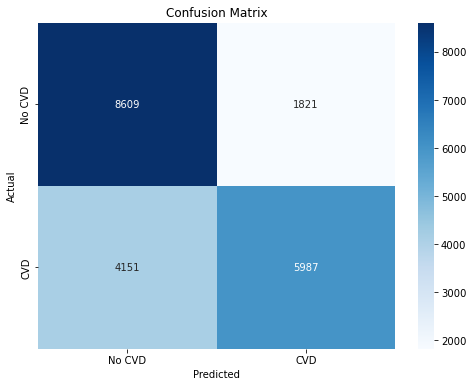

In [10]:
# Матрица неточностей
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#нормализованная
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_normalized, 
    annot=True, 
    fmt='.2f',
    cmap='Blues', 
    xticklabels=['No CVD', 'CVD'], 
    yticklabels=['No CVD', 'CVD']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [12]:
# Вывод метрик
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Metrics:
Accuracy: 0.71
Precision: 0.77
Recall: 0.59
F1-score: 0.67


**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

In [8]:
features = ['cholesterol', 'gluc']
target = 'cardio'
df = data[features + [target]].copy()

In [9]:
#разделение на train test
np.random.seed(42)
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [10]:
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 48100, Test size: 20459


In [11]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = y.unique()
        self.priors = {c: (y == c).mean() for c in self.classes}
        self.likelihoods = {}
        for col in X.columns:
            self.likelihoods[col] = {}
            for c in self.classes:
                subset = X[y == c][col]
                value_counts = subset.value_counts(normalize=True)
                self.likelihoods[col][c] = value_counts.to_dict()

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for c in self.classes:
                prob = self.priors[c]
                for col in X.columns:
                    val = row[col]
                    prob *= self.likelihoods[col][c].get(val, 1e-6)  # сглаживание
                probs[c] = prob
            predictions.append(max(probs, key=probs.get))
        return predictions

In [12]:
from collections import defaultdict
model = NaiveBayes()
model.fit(train[features], train[target])

In [13]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(test[features])
y_true = test[target].values

In [14]:
# Матрица неточностей
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    for i in range(len(y_true)):
        true_class = y_true[i]
        pred_class = y_pred[i]
        cm[true_class][pred_class] += 1
    
    return cm

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8045 2206]
 [6212 3996]]


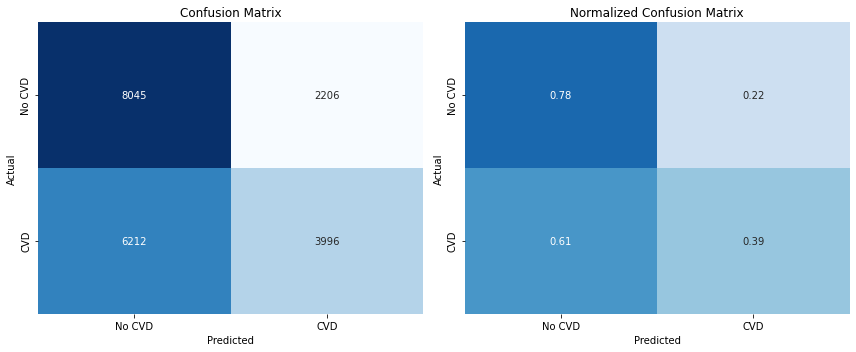

In [15]:
#матрицы неточностей
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

#нормализованная
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

In [31]:
binary_features = ['gender', 'smoke', 'alco', 'active']
target = 'cardio'
df_binary = data[binary_features + [target]].copy()
df_binary['gender'] = df_binary['gender'].replace({1: 0, 2: 1})

In [32]:
X_bin = df_binary[binary_features]
y_bin = df_binary[target]

In [33]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

In [34]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = y.unique()
        self.class_probs = y.value_counts(normalize=True).to_dict()
        self.feature_probs = {}

        for col in X.columns:
            self.feature_probs[col] = {}
            for val in [0, 1]:
                self.feature_probs[col][val] = {}
                for label in self.classes:
                    p = (X[y == label][col] == val).mean()
                    self.feature_probs[col][val][label] = p

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for label in self.classes:
                prob = self.class_probs[label]
                for col in X.columns:
                    prob *= self.feature_probs[col][row[col]][label]
                probs[label] = prob
            predictions.append(max(probs, key=probs.get))
        return np.array(predictions)

In [35]:
nb_bin = NaiveBayes()
nb_bin.fit(X_train_bin, y_train_bin)
y_pred_bin = nb_bin.predict(X_test_bin)

In [36]:
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix_bin = confusion_matrix(y_test_bin, y_pred_bin)
report_bin = classification_report(y_test_bin, y_pred_bin)

In [30]:
# Матрица неточностей
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 5))

# Обычная матрица неточностей
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Нормализованная матрица
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [20568, 20459]

Accuracy: 0.5150

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.81      0.63     10397
           1       0.52      0.21      0.30     10171

    accuracy                           0.52     20568
   macro avg       0.52      0.51      0.46     20568
weighted avg       0.52      0.52      0.47     20568



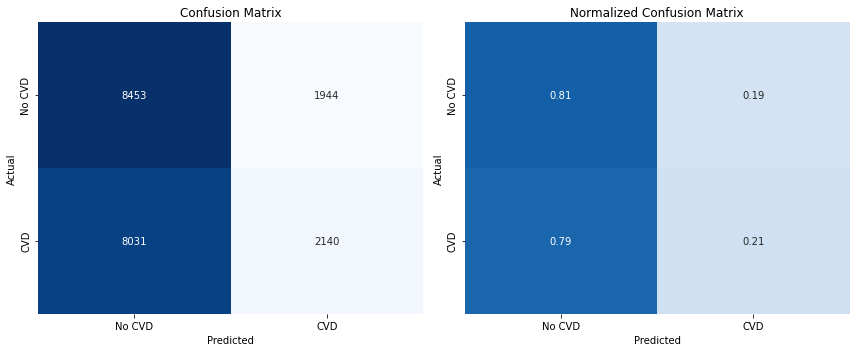

In [38]:
df = pd.read_csv("D://шкИла//третекурс//6 сем//обработка речи//mlbootcamp5_train.csv", sep=";", index_col="id")

data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data = data[(data['height'] > 100) & (data['height'] < 250)]
data = data[(data['weight'] > 30) & (data['weight'] < 200)]
data = data[data['ap_lo'] < data['ap_hi']]

# Подготовка бинарных признаков
binary_features = ['gender', 'smoke', 'alco', 'active']
target = 'cardio'

df_binary = data[binary_features + [target]].copy()

# gender: замена 1 → 0 (муж), 2 → 1 (жен)
df_binary['gender'] = df_binary['gender'].replace({1: 0, 2: 1})

# Объявление признаков и целевой переменной
X_bin = df_binary[binary_features]
y_bin = df_binary[target]

# Разделение на обучающую и тестовую выборки
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

# Собственный наивный байесовский классификатор
class NaiveBayes:
    def fit(self, X, y):
        self.classes = y.unique()
        self.class_probs = y.value_counts(normalize=True).to_dict()
        self.feature_probs = {}

        for col in X.columns:
            self.feature_probs[col] = {}
            for val in [0, 1]:
                self.feature_probs[col][val] = {}
                for label in self.classes:
                    p = (X[y == label][col] == val).mean()
                    self.feature_probs[col][val][label] = p

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for label in self.classes:
                prob = self.class_probs[label]
                for col in X.columns:
                    prob *= self.feature_probs[col][row[col]][label]
                probs[label] = prob
            predictions.append(max(probs, key=probs.get))
        return np.array(predictions)

# Обучение модели
nb_bin = NaiveBayes()
nb_bin.fit(X_train_bin, y_train_bin)
y_pred_bin = nb_bin.predict(X_test_bin)

# Метрики
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
conf_matrix_bin = confusion_matrix(y_test_bin, y_pred_bin)
report_bin = classification_report(y_test_bin, y_pred_bin)

print(f"Accuracy: {accuracy_bin:.4f}")
print("\nClassification Report:\n", report_bin)

# Матрицы неточностей
plt.figure(figsize=(12, 5))

# Обычная матрица
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_bin, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'],
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Нормализованная
cm_normalized = conf_matrix_bin.astype('float') / conf_matrix_bin.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'],
            cbar=False, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

In [68]:
quant_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cat_features = ['cholesterol', 'gluc']
binary_features = ['gender', 'smoke', 'alco', 'active']
df_binary = data[binary_features + ['cardio']]
X_bin = df_binary[binary_features]
y_bin = df_binary['cardio']
data['gender'] = data['gender'].apply(lambda x: 1 if x == 2 else 0)

for col in ['smoke', 'alco', 'active']:
    data = data[data[col].isin([0, 1])]

In [69]:
X = data[quant_features + cat_features + binary_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [70]:
#признаки по типам
X_train_quant = X_train[quant_features]
X_test_quant = X_test[quant_features]

X_train_cat = X_train[cat_features]
X_test_cat = X_test[cat_features]

X_train_bin = X_train[binary_features]
X_test_bin = X_test[binary_features]

In [71]:
#господипомилуй
class NaiveBayesCombined:
    def fit(self, X_quant, X_cat, X_bin, y):
        self.classes = y.unique()
        self.class_probs = y.value_counts(normalize=True).to_dict()

        self.quant_stats = {
            feature: {
                cls: (X_quant[y == cls][feature].mean(), X_quant[y == cls][feature].std())
                for cls in self.classes
            }
            for feature in X_quant.columns
        }

        self.cat_probs = {
            feature: {
                val: {
                    cls: (X_cat[y == cls][feature] == val).mean()
                    for cls in self.classes
                }
                for val in X_cat[feature].unique()
            }
            for feature in X_cat.columns
        }

        self.bin_probs = {
            feature: {
                val: {
                    cls: (X_bin[y == cls][feature] == val).mean()
                    for cls in self.classes
                }
                for val in [0, 1]
            }
            for feature in X_bin.columns
        }

    def predict(self, X_quant, X_cat, X_bin):
        results = []
        for i in range(len(X_quant)):
            probs = {}
            for cls in self.classes:
                prob = self.class_probs[cls]

                # количественные
                for feature in X_quant.columns:
                    mean, std = self.quant_stats[feature][cls]
                    x = X_quant.iloc[i][feature]
                    prob *= (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

                # категориальные
                for feature in X_cat.columns:
                    val = X_cat.iloc[i][feature]
                    prob *= self.cat_probs[feature].get(val, {}).get(cls, 1e-6)

                # бинарные
                for feature in X_bin.columns:
                    val = X_bin.iloc[i][feature]
                    prob *= self.bin_probs[feature][val][cls]

                probs[cls] = prob

            results.append(max(probs, key=probs.get))
        return np.array(results)

In [72]:
# Обучение и предсказание
nb_combined = NaiveBayesCombined()
nb_combined.fit(X_train_quant, X_train_cat, X_train_bin, y_train)
y_pred_combined = nb_combined.predict(X_test_quant, X_test_cat, X_test_bin)

# Метрики
accuracy_combined = accuracy_score(y_test, y_pred_combined)
conf_matrix_combined = confusion_matrix(y_test, y_pred_combined)
report_combined = classification_report(y_test, y_pred_combined)

accuracy_combined, conf_matrix_combined, report_combined

(0.7165985997666278,
 array([[8459, 1938],
        [3891, 6280]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.68      0.81      0.74     10397\n           1       0.76      0.62      0.68     10171\n\n    accuracy                           0.72     20568\n   macro avg       0.72      0.72      0.71     20568\nweighted avg       0.72      0.72      0.71     20568\n')

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No CVD', 'CVD'])

print(f"\033[1mAccuracy:\033[0m {accuracy:.4f}\n")
print("\033[1mClassification Report:\033[0m")
print(report)

ValueError: Found input variables with inconsistent numbers of samples: [20568, 20459]

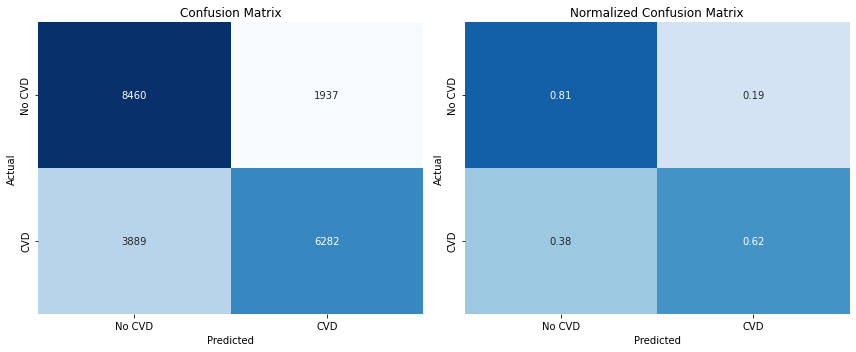

In [67]:
cm = conf_matrix_combined

plt.figure(figsize=(12, 5))

# Обычная матрица
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Нормализованная матрица
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], 
            yticklabels=['No CVD', 'CVD'],
            cbar=False, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()